In [ ]:
import pandas as pd 
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler() 
from sklearn.cluster import KMeans                   
from sklearn.cluster import AgglomerativeClustering

Mounted at /content/drive


In [ ]:
!pip install kneed          
from kneed import KneeLocator

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


We load the data

In [ ]:
filename = '/content/drive/My Drive/CV Portfolio/Data/CARS_1.csv'

df = pd.read_csv(filename)
df.head()

,car_name,reviews_count,fuel_type,engine_displacement,no_cylinder,seating_capacity,transmission_type,fuel_tank_capacity,body_type,rating,starting_price,ending_price,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp
0,Maruti Alto K10,51,Petrol,998,3,5.0,Automatic,27.0,Hatchback,4.5,399000,583000,89.0,3500,65.71,5500
1,Maruti Brezza,86,Petrol,1462,4,5.0,Automatic,48.0,SUV,4.5,799000,1396000,136.8,4400,101.65,6000
2,Mahindra Thar,242,Diesel,2184,4,4.0,Automatic,57.0,SUV,4.5,1353000,1603000,300.0,2800,130.00,3750
3,Mahindra XUV700,313,Diesel,2198,4,7.0,Automatic,60.0,SUV,4.5,1318000,2458000,450.0,2800,182.38,3500
4,Mahindra Scorpio-N,107,Diesel,2198,4,7.0,Automatic,57.0,SUV,4.5,1199000,2390000,400.0,2750,172.45,3500


We clean some data related to categorical data

In [ ]:
def fuel(algo):
  if algo == 'Petrol':
    return int(0)
  elif algo == 'Diesel':
    return int(1) 
  elif algo == 'CNG':
    return int(2) 
  elif algo == 'Electric':
    return int(3) 

def transmission(algo):
  if algo == 'Automatic':
    return int(0)
  elif algo == 'Manual':
    return int(1) 
  elif algo == 'Electric':
    return int(2) 

def body(algo):
  if algo == 'Hatchback':
    return int(0)
  elif algo == 'Wagon':
    return int(1) 
  elif algo == 'SUV':
    return int(2)
  elif algo == 'MUV':
    return int(3) 
  elif algo == 'Sedan':
    return int(4)
  elif algo == 'Hybrid':
    return int(5) 
  elif algo == 'Minivan':
    return int(6)
  elif algo == 'Pickup Truck':
    return int(7) 
  elif algo == 'Coupe':
    return int(8)
  elif algo == 'Convertible':
    return int(9) 
  elif algo == 'Luxury':
    return int(10)

df['fuel'] = df['fuel_type'].apply(fuel)
df['transmission'] = df['transmission_type'].apply(transmission)
df['body'] = df['body_type'].apply(body)

We choose our features columns

In [ ]:
features = ['body', 'transmission','fuel', 'engine_displacement', 'no_cylinder','fuel_tank_capacity',
            'max_torque_nm', 'max_torque_rpm', 'max_power_bhp', 'max_power_rp']

X = df[features].to_numpy()

print('Matrix\'s shape: {}'.format(X.shape))

Matrix's shape: (203, 10)


We scaled the data, fit and transform PCA

In [ ]:
std_scale.fit(X)
X_scaled = std_scale.transform(X)

pca = PCA(n_components=None)

pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
print('PC\'s shape: {}'.format(X_pca.shape))
print(X_pca)

PC's shape: (203, 10)
[[ 1.22020467 -2.14834597  0.79170586 ...  0.05884936 -0.15647151
   0.06944403]
 [ 0.23547738 -2.00509569  0.02865225 ... -0.09409015 -0.11417876
  -0.06342814]
 [ 0.79224282 -0.41479581 -0.35785019 ... -0.11502336  0.02684585
   0.10868564]
 ...
 [ 1.29860361  0.27373679 -0.5648946  ... -0.11248476  0.17932739
  -0.09630039]
 [-2.94091006  0.78238696  0.28182439 ...  0.03890865 -0.0481116
  -0.12859019]
 [ 1.70932613 -1.89880424  0.37672867 ...  0.08568721  0.03024834
  -0.1157115 ]]


In this plot we have a general view of the data on the PC1 x PC2 plot

Text(0, 0.5, 'PC2')

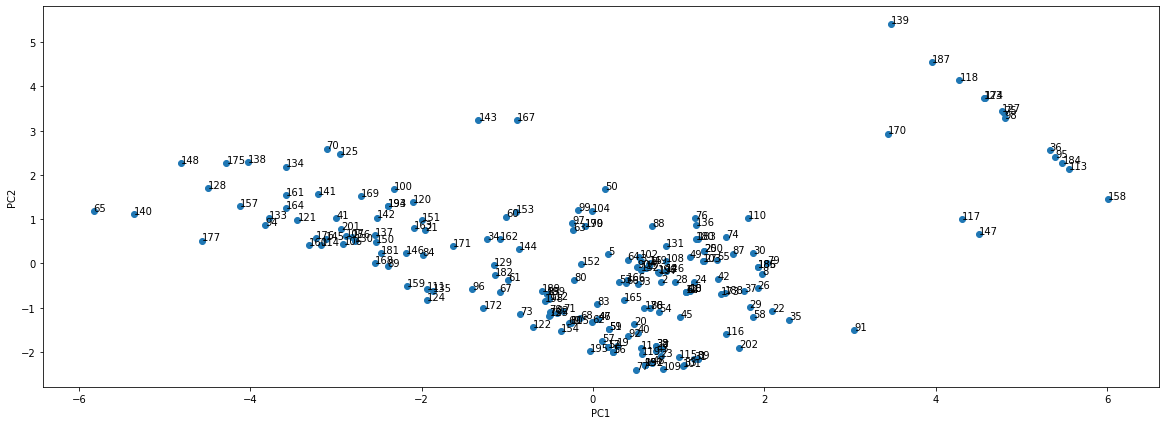

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

ax.scatter(X_pca[:, 0], X_pca[:, 1])

for i in range(X_scaled.shape[0]):
  ax.text(X_pca[i, 0], X_pca[i, 1], s = i)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

Text(0.5, 0, 'Number of main components')

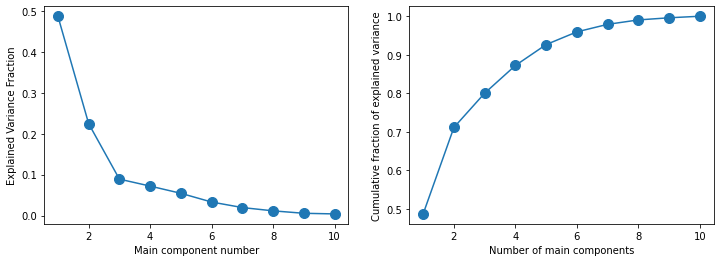

In [ ]:
evr = pca.explained_variance_ratio_

fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(range(1, len(evr) + 1), evr, '.-', markersize = 20)
ax[0].set_ylabel('Explained Variance Fraction')
ax[0].set_xlabel('Main component number')

cumulative_variance = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), cumulative_variance, '.-', markersize = 20)
ax[1].set_ylabel('Cumulative fraction of explained variance')
ax[1].set_xlabel('Number of main components')

In [ ]:
print('Features = {}'.format(features))
print('PCA1 = {}'.format(pca.components_[0]))
print('PCA2 = {}'.format(pca.components_[1]))

Features = ['body', 'transmission', 'fuel', 'engine_displacement', 'no_cylinder', 'fuel_tank_capacity', 'max_torque_nm', 'max_torque_rpm', 'max_power_bhp', 'max_power_rp']
PCA1 = [-0.21121616  0.30635449  0.3344403  -0.40444157 -0.41524679 -0.22719132
 -0.25977725 -0.31036783 -0.31241692 -0.317252  ]
PCA2 = [ 0.28576658  0.28035833  0.33761049  0.1892375   0.11419603 -0.10988258
  0.49128961 -0.32843195  0.42135357 -0.37156187]


In [ ]:
features_pc = pca.components_.T

print('Descripción de la variable M2 en las componentes principales:')
print(features_pc[0])

Descripción de la variable M2 en las componentes principales:
[-0.21121616  0.28576658 -0.51748035 -0.46387338  0.61167914  0.0780607
  0.07215505  0.01786012  0.04610511 -0.05352488]


Text(0, 0.5, 'PC2')

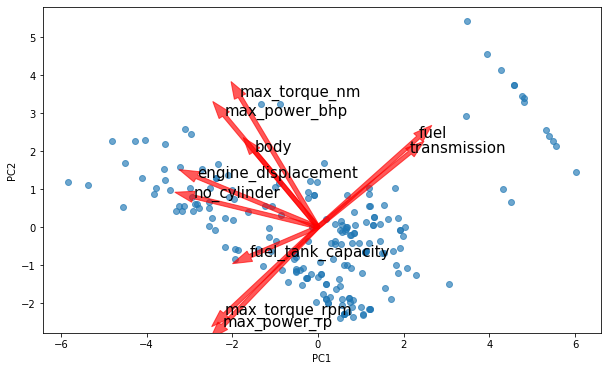

In [ ]:
fig, ax = plt.subplots(figsize = (10, 6))

ax.scatter(X_pca[:,0], X_pca[:,1], alpha = 0.65)

sf = 7 
      
for i in range(len(features)):

  ax.arrow(0, 0, sf * features_pc[i][0], sf * features_pc[i][1], width = 0.1, color = 'r', alpha = 0.65)
  ax.text(sf * features_pc[i][0], sf * features_pc[i][1], s = features[i], fontdict= {'color': 'k', 'size': 15})

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')

In [ ]:
sse = []

for k in range(1, 20):
  kkmeans = KMeans(n_clusters=k)
  kkmeans.fit(X_pca)
  sse.append(kkmeans.inertia_)

Using KneeLocator (that sums the total distance to the centroids) we can spot the where the slope down is less pronounce. And we choose in this case the 6 for the number of clusters.

Text(0, 0.5, 'SSE')

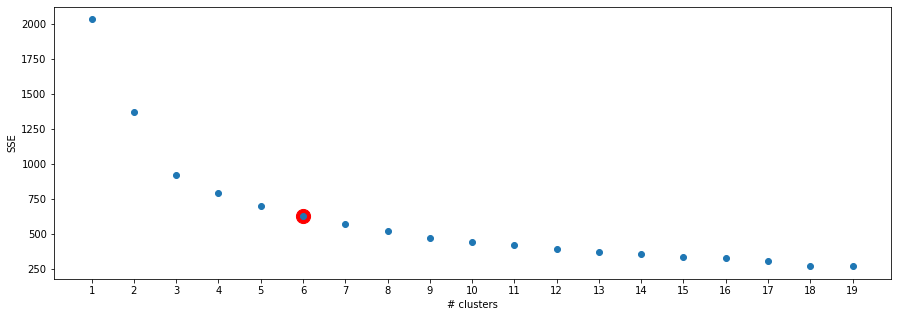

In [ ]:
fig, ax = plt.subplots(figsize = (15, 5))

ax.scatter(6, sse[5], color='red', s=200) 

ax.scatter(range(1, 20), sse)            
ax.set_xticks(range(1, 20))
ax.set_xlabel("# clusters")
ax.set_ylabel("SSE")

We fit the data and get the centroids location

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_pca)

centroids = kmeans.cluster_centers_

In [ ]:
# print(f'Value of Kmean\'s labels: {np.unique(kmeans.labels_)}\n')
# print(f'Full array of Kmean\'s labels: {kmeans.labels_}')

Value of Kmean's labels: [0 1 2 3 4 5]



In [ ]:


# print("Centroids shape:",centroids.shape)
# # Printeo las posiciones de las primeras 5 muestras en sus primeras dos componentes principales
# print(centroids[:5,[0,1]])

We plot PC1 and PC2 componentes with the centroids and hue colors according to its cluster

Text(0, 0.5, 'PC2')

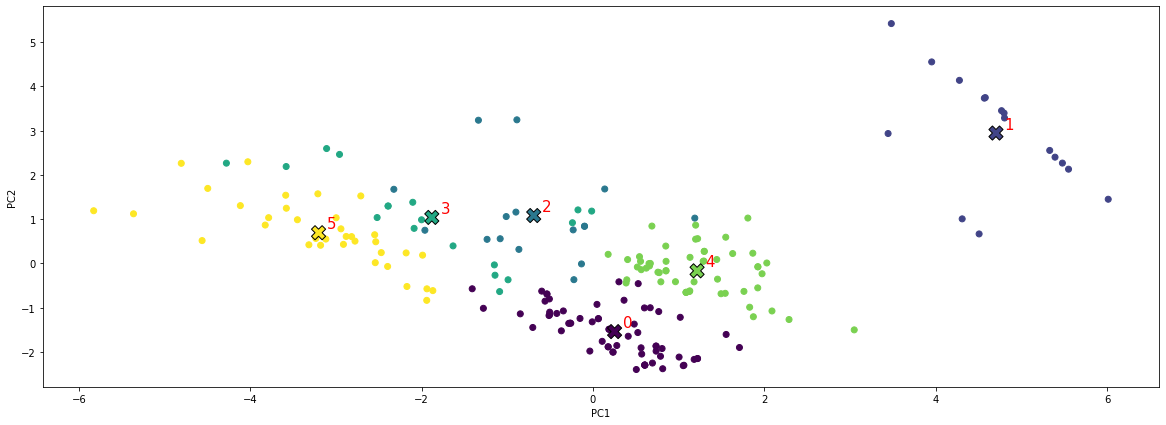

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

ax.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
ax.scatter(centroids[:, 0], centroids[:, 1], marker="X", s=200, linewidths=1,
            c=np.unique(kmeans.labels_), edgecolors='black')

for i in range(np.unique(kmeans.labels_).shape[0]):
  ax.text(centroids[i, 0]+0.1, centroids[i, 1]+0.1, s = i, fontsize=15,color='red')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')


The clustering identified upper right the cluster number 1. Getting into the data we can suppose that the spec of transmission_type = Electric it was a strong factor for the kmeans model.

In [ ]:
df2 = df.copy()
var_1 = pd.Series(data=kmeans.labels_)
df['K_label'] = var_1

features = ['car_name', 'body_type', 'transmission_type','fuel_type', 'engine_displacement', 'no_cylinder','fuel_tank_capacity',
                         'max_torque_nm', 'max_torque_rpm', 'max_power_bhp', 'max_power_rp', 'K_label']

df.loc[df['K_label']== 3,features]

,car_name,body_type,transmission_type,fuel_type,engine_displacement,no_cylinder,fuel_tank_capacity,max_torque_nm,max_torque_rpm,max_power_bhp,max_power_rp,K_label
36,Hyundai Kona Electric,SUV,Electric,Electric,0,0,0.0,395.0,0,134.10,0,3
75,Kia EV6,SUV,Electric,Electric,0,0,0.0,605.0,0,320.55,0,3
95,MG ZS EV,SUV,Electric,Electric,0,0,0.0,280.0,0,173.83,0,3
98,BMW i4,Sedan,Electric,Electric,0,0,0.0,430.0,0,335.25,0,3
113,BYD E6,MUV,Electric,Electric,0,0,0.0,180.0,0,93.87,0,3
117,Mini Cooper SE,Hatchback,Automatic,Electric,0,0,0.0,270.0,1000,181.03,0,3
118,Audi e-tron,Coupe,Electric,Electric,0,0,0.0,664.0,0,300.00,0,3
123,Porsche Taycan,Wagon,Electric,Electric,0,0,0.0,650.0,0,482.76,0,3
127,BMW iX,SUV,Electric,Electric,0,0,0.0,630.0,0,321.84,0,3
139,Mercedes-Benz EQS,Sedan,Electric,Electric,0,0,0.0,1020.0,0,750.97,0,3
